In [71]:
URL = "https://www.youtube.com/watch?v=y316Fh2Qlzk"

In [72]:
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys
import pandas as pd
import time
import random

In [73]:
# 웹드라이버 설정
browser = webdriver.Chrome()
browser.get(URL)  # 유튜브 비디오 URL 입력

time.sleep(2)  # 페이지 로딩 대기

# 댓글 섹션까지 스크롤
browser.find_element(By.TAG_NAME, 'body').send_keys(Keys.PAGE_DOWN)
time.sleep(6)  # 동적 로딩 대기

In [74]:
# 스크롤 다운하여 모든 댓글 로드
last_height = browser.execute_script("return document.documentElement.scrollHeight")
while True:
    browser.execute_script("window.scrollTo(0, document.documentElement.scrollHeight);")
    time.sleep(random.uniform(1.5, 3.0))  # 로딩과 다양성을 위해 랜덤 대기 시간 적용
    new_height = browser.execute_script("return document.documentElement.scrollHeight")
    if new_height == last_height:
        break
    last_height = new_height

In [75]:
# 댓글 요소 수집
comments = browser.find_elements(By.XPATH, '//*[@id="content-text"]')
usernames = browser.find_elements(By.XPATH, '//*[@id="author-text"]')
likes = browser.find_elements(By.XPATH, '//*[contains(@id, "vote-count-middle")]')
#dates = browser.find_elements(By.XPATH, '//*[@id="header-author"]//yt-formatted-string/a')
#reply_counts = browser.find_elements(By.XPATH, '//ytd-comment-thread-renderer//span[@id="vote-count-middle"]/following-sibling::span')

# DataFrame 생성
data = {
    # '작성일': [date.text for date in dates],
    '사용자이름': [username.text for username in usernames],
    'comment': [comment.text for comment in comments],
    '좋아요수': [like.text if like.text != '' else '0' for like in likes],
    # '답글수': [reply.text.split()[0] if reply.text != '' else '0' for reply in reply_counts]
}
df = pd.DataFrame(data)

# DataFrame 확인
print(df)


                사용자이름                                            comment 좋아요수
0    @user-lw5sv1gh4o  유작가님 저는 제 자식에게  제가 이세상에 없더라도 어떤 문제가 있을때 혼자서 판단...  140
1    @user-xf5os8nn3i  신이시여\n우리 유작가님께 200살의 수명을 주십시오\n우리곁에 오래오래 함께 할수...  301
2     @nayoungkim5588  유시민작가님이 계셔서 든든합니다.고맙습니다.감사합니다\n조수진변호사님 항상 감사합니...  203
3    @user-pd1xr2op1n  위대한 정치가인 노무현 대통령님 존경하고 넘 그립습니다.\n박학다식 유작가님, 박교...  215
4    @user-kr6nx5no2s  유시민 작가님이 그 자리에 그저 계셔주신 것만으로도 든든합니다. 감사합니다.\n항상...  200
..                ...                                                ...  ...
175  @user-mm1ob4uc2w  석가의 유언이 내가 죽은뒤 나를 신격화하지마라. 라고 했었으나 신격화 된것을 보면 ...    0
176  @user-dy2ue3pb1x                                         총균쇠 공감합니다.    0
177  @user-zi1up4ey7y                            존 스타인 백의''분노의 포도'' 추천이요    1
178  @user-id3ms7qr8w                              꼭 다 읽어보고 싶습니다. 영어로 ㅠㅠ    0
179  @user-xp8et5ql8u                          생각보다 너무 두꺼워 놀랐었던 책 ㅋㅋㅋ ㅠㅠ    1

[180 rows x 3 columns]


In [86]:

# 댓글 요소 수집
comments = browser.find_elements(By.XPATH, '//*[@id="content-text"]')
usernames = browser.find_elements(By.XPATH, '//*[@id="author-text"]')
n_likes = browser.find_elements(By.XPATH, '//*[contains(@id, "vote-count-middle")]')
author_elements = browser.find_elements(By.CSS_SELECTOR, "#author-text .yt-simple-endpoint.style-scope.ytd-comment-view-model")
time_elements = browser.find_elements(By.CSS_SELECTOR, "#published-time-text .yt-simple-endpoint.style-scope.ytd-comment-view-model")
# reply_count_elements = browser.find_elements(By.XPATH, '//*[@id="more-replies"]/yt-button-shape/button/div[2]/span')

# reply_counts = []
# for comment in reply_count_elements:
#     try:
#         reply_count = comment.find_element(By.XPATH, './/*[@id="more-replies"]/yt-button-shape/button/div[2]/span').text.strip()
#     except:
#         reply_count = "-1"
#     reply_counts.append(reply_count)

# DataFrame 생성
data = {
    'usernames': [username.text for username in usernames],
    'n_likes': [like.text if like.text != '' else '0' for like in likes],
    'times' : [element.text.strip() for element in time_elements],
    'comment': [comment.text for comment in comments],
    # 'reply_counts' : [element.text.strip() for element in reply_count_elements]
}

df = pd.DataFrame(data)
df['comment'] = df['comment'].str.replace('[^가-힣]', ' ', regex = True) # 댓글 전처리
df['comment']

# DataFrame 확인
print(df)

            usernames n_likes       times  \
0    @user-lw5sv1gh4o     140       1개월 전   
1    @user-xf5os8nn3i     301       1개월 전   
2     @nayoungkim5588     203       1개월 전   
3    @user-pd1xr2op1n     215  1개월 전(수정됨)   
4    @user-kr6nx5no2s     200       1개월 전   
..                ...     ...         ...   
175  @user-mm1ob4uc2w       0       1개월 전   
176  @user-dy2ue3pb1x       0       1개월 전   
177  @user-zi1up4ey7y       1       1개월 전   
178  @user-id3ms7qr8w       0       1개월 전   
179  @user-xp8et5ql8u       1       1개월 전   

                                               comment  
0    유작가님 저는 제 자식에게  제가 이세상에 없더라도 어떤 문제가 있을때 혼자서 판단...  
1    신이시여\n우리 유작가님께 200살의 수명을 주십시오\n우리곁에 오래오래 함께 할수...  
2    유시민작가님이 계셔서 든든합니다.고맙습니다.감사합니다\n조수진변호사님 항상 감사합니...  
3    위대한 정치가인 노무현 대통령님 존경하고 넘 그립습니다.\n박학다식 유작가님, 박교...  
4    유시민 작가님이 그 자리에 그저 계셔주신 것만으로도 든든합니다. 감사합니다.\n항상...  
..                                                 ...  
175  석가의 유언이 내가 죽은뒤 나를 신격화하지마라. 라고 했었으나 신격화 된것을 보면 ...  
176

In [77]:
len(comments)
len(usernames)
len(n_likes)
# len(usernames)
# len(time_elements)
# len(reply_counts)

180

In [88]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from matplotlib import rc
import seaborn as sns
%matplotlib inline

# plt 한국어폰트설정맥북환경 애플고딕
rc('font', family='AppleGothic')

In [80]:
# pip install soynlp

In [81]:
from soynlp.noun import LRNounExtractor_v2
import pandas as pd

# 모든 댓글을 하나의 문자열로 결합
comments_string = df['comment'].str.cat(sep=' ')

# soynlp 명사 추출기 인스턴스 생성
noun_extractor = LRNounExtractor_v2()
nouns = noun_extractor.train_extract([comments_string])  # 배열 형태로 입력

# 추출된 명사를 다시 하나의 문자열로 결합
nouns_string = ' '.join(nouns.keys())  # 추출된 명사들의 key만 사용

# 결과 출력
nouns_string

[Noun Extractor] use default predictors
[Noun Extractor] num features: pos=3929, neg=2321, common=107
[Noun Extractor] counting eojeols
[EojeolCounter] n eojeol = 1636 from 1 sents. mem=0.068 Gb                    
[Noun Extractor] complete eojeol counter -> lr graph
[Noun Extractor] has been trained. #eojeols=2326, mem=0.070 Gb
[Noun Extractor] batch prediction was completed for 615 words
[Noun Extractor] checked compounds. discovered 8 compounds
[Noun Extractor] postprocessing detaching_features : 173 -> 171
[Noun Extractor] postprocessing ignore_features : 171 -> 161
[Noun Extractor] postprocessing ignore_NJ : 161 -> 161
[Noun Extractor] 161 nouns (8 compounds) with min frequency=1
[Noun Extractor] flushing was done. mem=0.071 Gb                    
[Noun Extractor] 34.05 % eojeols are covered


'조수진변호사님 알릴레오북스 유시민작가님 다이아몬드 유작가님 알릴레오 변호사님 프로그램 유시민님 교수님 유시민 총균쇠 고기후 언제나 우리곁 오래전 다음주 신격화 두꺼워 도서관 페이지 유튜브 알북스 이야기 화이팅 작가님 벽돌책 아는것 어르신 기후 지리 우리 최고 세분 연구 댓글 내용 환경 진화 현대 생각 기대 방송 시간 알게 조절 지금 언젠 자리 나이 기억 역사 채널 시작 오래 소개 완독 호수 문제 미소 재미 북스 지구 흥미 주제 이걸 지배 빙하 좋아 건강 질문 복습 실패 오늘 영상 붕괴 기원 사람 설명 우연 감정 알북 강릉 오랫 유익 든든 비슷 관련 위치 시청 인상 책들 존경 유명 도전 이번 기분 다음 부분 영향 시도 감사 응원 뿌듯 추천 원서 심리 정치 말씀 수진 한분 느낌 인간 관심 힘 책 살 백 삶 강 안 왜 못 끝 귀 편 뒤 번 집 곳 섬 제 새 꼭 내 세 쇠 국 분 부 참 것 북 년 대 또 파 깨 갓 독 거 점 많 손 잠 돈 등 고기후연구 지리이야기 연구내용 기대기대'

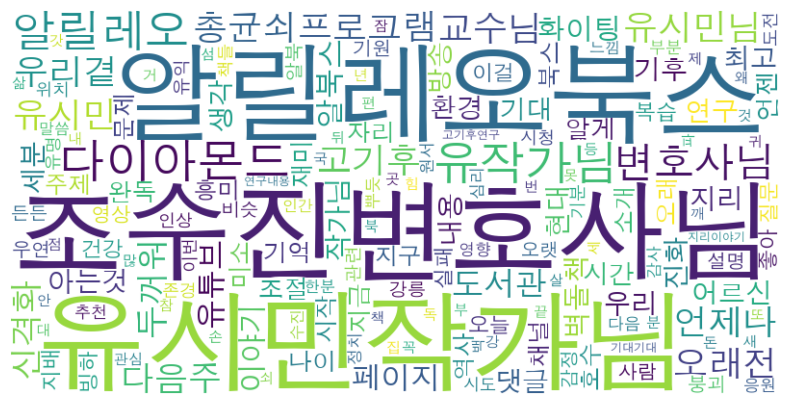

In [82]:
# 워드 클라우드 생성
wordcloud = WordCloud(
    font_path = '/System/Library/Fonts/AppleGothic.ttf', # 애플고딕 폰트 사용(맥북환경에서 한국어 폰트 사용시 필수)
    width = 800, height = 400, background_color ='white').generate(nouns_string)

# 워드 클라우드 표시
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [83]:
# !pip install konlpy

In [84]:
# 자바 버전 이슈로 실행이 안됨


# from konlpy.tag import Okt
# import pandas as pd

# # Okt 형태소 분석기 인스턴스 생성
# okt = Okt()


# # 모든 댓글을 하나의 문자열로 결합
# comments_string = df['comment'].str.cat(sep=' ')

# # 명사 추출
# nouns = okt.nouns(comments_string)

# # 추출된 명사를 다시 하나의 문자열로 결합
# nouns_string = ' '.join(nouns)


# # 워드 클라우드 생성
# wordcloud = WordCloud(font_path = '/System/Library/Fonts/AppleGothic.ttf',
#                       width = 800,
#                       height = 400, 
#                       background_color ='white').generate(nouns_string)

# # 워드 클라우드 표시
# plt.figure(figsize=(100, 50))
# plt.imshow(wordcloud, interpolation='bilinear')
# plt.axis("off")
# plt.show()